In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
df = pd.read_csv('cust2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cust_no         35 non-null     int64  
 1   Ec-products     35 non-null     float64
 2   Stationary      35 non-null     float64
 3   fashion_prod    35 non-null     float64
 4   other_shopping  35 non-null     float64
 5   Savings         35 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.8 KB


In [2]:
# Difining input features and output features
X_features = ['Ec-products', 'Stationary', 'fashion_prod', 'other_shopping']
Y_features = ['Savings']
input_df = df[X_features]
X = sm.add_constant(input_df)
Y = df[Y_features]

# 7.1 making model without multicolinearity analysis
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=0.8, random_state=42) 
model_1 = sm.OLS(train_Y, train_X).fit()
model_1.summary()

# Without removing the multicolinearity the useful features are Ec-products, Stationary and other_shopping 
# because their p value is less than 0.05 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Savings   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.530e+29
Date:                Mon, 18 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:43:45   Log-Likelihood:                 839.56
No. Observations:                  28   AIC:                            -1669.
Df Residuals:                      23   BIC:                            -1662.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.998e-14   1.51e-14     -1.327      0.198   -5.11e-14    1.12e-14
Ec-products      -11.0000   9.05e-14  -1.22e+14      0.000     -11.000     -11.000
Stationary        10.0000    8.2e-14   1.22e+14      0.000      10.000      10.000
fashion_prod   -6.217e-15   8.55e-15     -0.727      0.475   -2.39e-14    1.15e-14
other_shopping    -2.0000   8.17e-15  -2.45e+14      0.000      -2.000      -2.000
==============================================================================
Omnibus:                        2.787   Durbin-Watson:                   0.870
Prob(Omnibus):                  0.248   Jarque-Bera (JB):                2.335
Skew:                          -0.691   Prob(JB):                        0.311
Kurtosis:                       2.693   Cond. No.                         318.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# finding the vif to find multicolinearity
def get_vif_factors(input_df) :
    vif = pd.DataFrame()
    vif["Features"] = input_df.columns
    vif["VIF"] = [variance_inflation_factor(input_df.values, i) for i in range(input_df.shape[1])]
    return vif


vif_factors = get_vif_factors(X[X_features])
vif_factors

,Features,VIF
0,Ec-products,252.448378
1,Stationary,594.182836
2,fashion_prod,50.033400
3,other_shopping,33.180599


<Axes: >

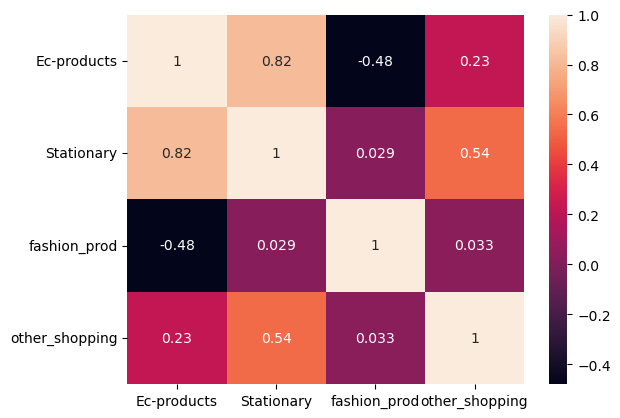

In [4]:
# Analysing the columns with large vif to find the multicolinearity between features
columns_with_large_vif = vif_factors[vif_factors.VIF > 4].Features
sn.heatmap(input_df[columns_with_large_vif].corr(), annot=True)

In [5]:
# From above heatmap we can see that Stationary and ec-products are highly related so we try to use only one of them
columns_to_be_removed = ['Stationary']
X_new_features = list(set(X) - set(columns_to_be_removed))
get_vif_factors(X[X_new_features])

,Features,VIF
0,other_shopping,1.084393
1,const,7.728824
2,fashion_prod,1.335046
3,Ec-products,1.406457


In [6]:
# Again making the model with removing multicolinearity
X = X.drop(columns_to_be_removed, axis=1)
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=0.8, random_state=42)
model_2 = sm.OLS(train_Y, train_X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Savings   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1395.
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           4.73e-27
Time:                        20:43:45   Log-Likelihood:                -24.731
No. Observations:                  28   AIC:                             57.46
Df Residuals:                      24   BIC:                             62.79
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.4494      0.364     -1.236      0.229      -1.200       0.301
Ec-products        0.0338      0.107      0.315      0.756      -0.188       0.255
fashion_prod       1.0387      0.021     49.418      0.000       0.995       1.082
other_shopping    -1.0120      0.027    -37.285      0.000      -1.068      -0.956
==============================================================================
Omnibus:                       21.905   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.495
Skew:                          -2.005   Prob(JB):                     6.49e-07
Kurtosis:                       5.889   Cond. No.                         37.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# as we can see from above only ec-products have p value larger than 0.05 so removing ec-products and rebuilding the model
significant_vars=['fashion_prod', 'other_shopping']
train_X = train_X[significant_vars]
model_3 = sm.OLS(train_Y, train_X).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Savings   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              2137.
Date:                Mon, 18 Sep 2023   Prob (F-statistic):                    1.45e-29
Time:                        20:43:45   Log-Likelihood:                         -25.868
No. Observations:                  28   AIC:                                      55.74
Df Residuals:                      26   BIC:                                      58.40
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
fashion_prod       1.0249      0.017     60.565      0.000       0.990       1.060
other_shopping    -1.0402      0.018    -58.609      0.000      -1.077      -1.004
==============================================================================
Omnibus:                       21.793   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.267
Skew:                          -1.995   Prob(JB):                     7.28e-07
Kurtosis:                       5.883   Cond. No.                         2.23
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
leverage_threshold = 3 * (len(train_X.columns) + 1) / len(train_X)
influence = model_3.get_influence()

# finding levarage values
leverage = influence.hat_matrix_diag
leverage_outliers = np.where(leverage >  leverage_threshold)[0]

# finding cook distance outlier
cook_distance = influence.cooks_distance[0]
cooks_threshold = 1
cook_outliers = np.where(cook_distance > cooks_threshold)[0]

# finding z-score threshold outlier
z_score_threshold = 3
residuals = model_3.resid
std_residuals = model_3.get_influence().resid_studentized_internal
z_score_outliers = np.where(np.abs(std_residuals) > z_score_threshold)[0]

# Printing outlier values using leverage
print("levarage outliers : \n")
for item in leverage_outliers :
    print("Value is :\n", train_X.iloc[item])
    print("\nLevarage value : ", leverage[item])
    print("Cook distance : ", cook_distance[item])
    print("Z-score : ", std_residuals[item])

print("\nCook outliers : \n")
for item in cook_outliers :
    print("Value is :\n", train_X.iloc[item])
    print("\nLevarage value : ", leverage[item])
    print("Cook distance : ", cook_distance[item])
    print("Z-score : ", std_residuals[item])
    
print("\nZ-score outliers : \n")
for item in z_score_outliers :
    print("Value is :\n", train_X.iloc[item])
    print("\nLevarage value : ", leverage[item])
    print("Cook distance: ", cook_distance[item])
    print("Z-score : ", std_residuals[item])

levarage outliers : 

Value is :
 fashion_prod      22.5
other_shopping     1.3
Name: 12, dtype: float64

Levarage value :  0.3345404701891955
Cook distance :  0.24400626085410404
Z-score :  -0.9852625504472285

Cook outliers : 


Z-score outliers : 

Value is :
 fashion_prod       0.3
other_shopping    11.6
Name: 20, dtype: float64

Levarage value :  0.10252986428302882
Cook distance:  0.5396157705868155
Z-score :  -3.07356304894302


In [9]:
# Removing the levarage outliers and retraining model
train_X = train_X.drop(leverage_outliers)
train_Y = train_Y.drop(leverage_outliers)

model_4 = sm.OLS(train_Y, train_X).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Savings   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              2060.
Date:                Mon, 18 Sep 2023   Prob (F-statistic):                    1.80e-28
Time:                        20:43:45   Log-Likelihood:                         -25.369
No. Observations:                  27   AIC:                                      54.74
Df Residuals:                      25   BIC:                                      57.33
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
fashion_prod       1.0247      0.017     59.479      0.000       0.989       1.060
other_shopping    -1.0411      0.018    -56.992      0.000      -1.079      -1.004
==============================================================================
Omnibus:                       20.145   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.294
Skew:                          -1.925   Prob(JB):                     5.30e-06
Kurtosis:                       5.603   Cond. No.                         2.18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

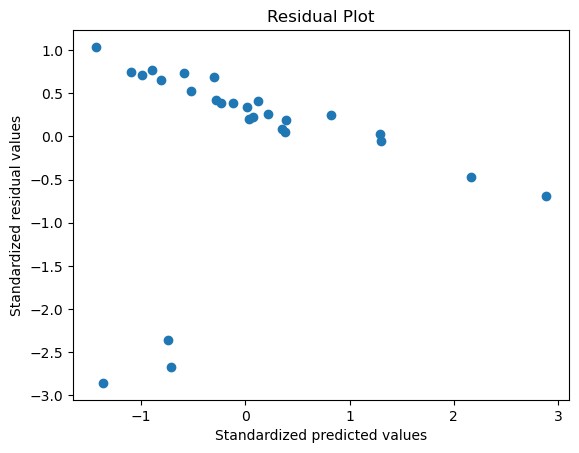

In [10]:
get_standardized_values = lambda x : (x - np.mean(x))/(np.std(x))
def plot_resid_fitted(fitted, resid, title):
    plt.scatter ( get_standardized_values( fitted ),get_standardized_values( resid ) )
    plt.title(title)
    plt.xlabel("Standardized predicted values")
    plt.ylabel("Standardized residual values")
    plt.show()

plot_resid_fitted(model_4.fittedvalues,model_4.resid,"Residual Plot")